<a href="https://colab.research.google.com/github/Baazigar007/GIS/blob/master/GIS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [0]:
img1_tif = plt.imread("/content/12_Aug_2016.tif")

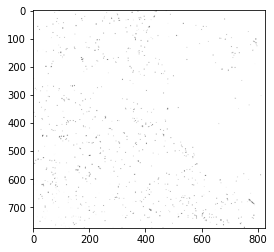

In [6]:
plt.imshow(img1_tif)
plt.show()

In [8]:
pip install rasterio

     |████████████████████████████████| 18.1MB 233kB/s 


In [0]:
import rasterio

In [0]:
image = rasterio.open("/content/12_Aug_2016.tif")

In [0]:
band = image.read(1)

In [13]:
band

array([[5463., 5298., 5454., ..., 5663., 5663., 2143.],
       [5221., 2991., 2991., ..., 8342., 8316., 8316.],
       [5221., 3103., 3103., ..., 8226., 8226., 8170.],
       ...,
       [4408., 4408., 4587., ..., 8916., 6563., 4785.],
       [3823., 3732., 3849., ..., 7649., 5124., 5124.],
       [4523., 4523., 3739., ..., 5613., 6072., 6770.]], dtype=float32)